In [1]:
from random_search import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns#
import math
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

## Load and prepare data

In [2]:
df = pd.read_csv('data/framingham.csv')
df = df.dropna()

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Train-test split

In [4]:
df_train = df.sample(frac=0.66)
df_valid = df.drop(df_train.index)

In [5]:
X_train = df_train[['male', 'age', 'education', 'currentSmoker',
                    'cigsPerDay', 'BPMeds', 'prevalentStroke',
                    'prevalentHyp', 'diabetes', 'totChol', 
                    'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
                   ]].to_numpy()
y_train = df_train['TenYearCHD'].to_numpy()

X_valid = df_valid[['male', 'age', 'education', 'currentSmoker',
                    'cigsPerDay', 'BPMeds', 'prevalentStroke',
                    'prevalentHyp', 'diabetes', 'totChol', 
                    'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
                   ]].to_numpy()
y_valid = df_valid['TenYearCHD'].to_numpy()

In [6]:
X_train = np.c_[np.ones((y_train.shape[0], 1)), X_train]
X_valid = np.c_[np.ones((y_valid.shape[0], 1)), X_valid]

In [7]:
X_train.shape

(2413, 16)

### Parameter m - tuning

In [9]:
m_vals = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
epochs = 20

In [19]:
loss_list = []
valid_loss_list = []

for m in m_vals:
    # set seed to get consistent results
    np.random.seed(987654)
    print('m = {}'.format(m))
    w, losses, valid_losses = random_search(epochs, X_train, y_train, X_valid, y_valid, 1e-5, m, log_loss)
    loss_list.append(losses)
    valid_loss_list.append(valid_losses)
    print('-------------------------')

m = 0.1
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599454
loss_w = 0.5925424118687255
valid_loss = 0.5928565716102131
-------------------------
m = 0.01
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599454
loss_w = 0.6560436266157725
valid_loss = 0.6562294582864736
-------------------------
m = 0.001
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599454
loss_w = 0.46004078282374056
valid_loss = 0.4620503865688111
-------------------------
m = 0.0001
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599454
loss_w = 0.4450658430114591
valid_loss = 0.44769948020008915
-------------------------
m = 1e-05
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599454
loss_w = 0.44438049847483224
valid_loss = 0.4470847523328746
-------------------------
m = 1e-06
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599454
loss_w = 0.4443209910015246
valid_loss = 0.4470323830212206
-------------------------


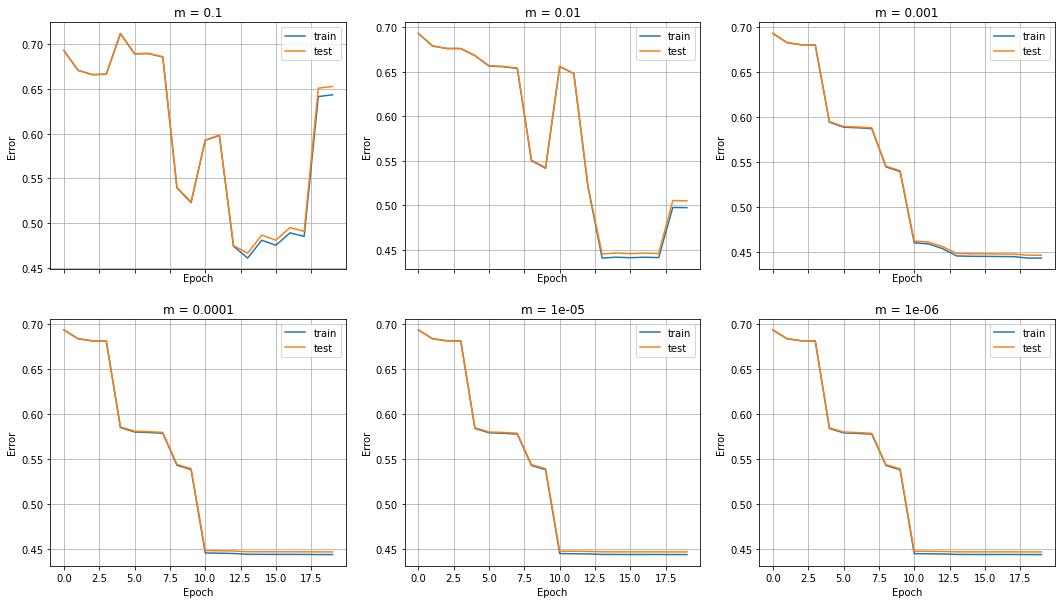

In [20]:
fig, axs = plt.subplots(2,3,sharey=False, sharex=True, figsize=(18,10))

for i in range(len(axs)):
    for j in range(len(axs[0])):
        n = i+j+2*i
        axs[i,j].plot(list(range(epochs)), loss_list[n], label = 'train')
        axs[i,j].plot(list(range(epochs)), valid_loss_list[n], label = 'test')
        axs[i,j].set_xlabel('Epoch')
        axs[i,j].set_ylabel('Error')
        axs[i,j].set_title('m = {}'.format(m_vals[n]))
        axs[i,j].grid()
        axs[i,j].legend()
        
#plt.savefig('figs/m_tuning')

In [21]:
for i in range(len(m_vals)):
    print('m = {}'.format(m_vals[i]))
    print('test error = {}'.format(valid_loss_list[i][-1]))

m = 0.1
test error = 0.6528614104016202
m = 0.01
test error = 0.5050507655879429
m = 0.001
test error = 0.4462295811085112
m = 0.0001
test error = 0.446236289341524
m = 1e-05
test error = 0.446220428302977
m = 1e-06
test error = 0.44621871845312755


In [22]:
final_losses = [valid_loss_list[i][-1] for i in range(len(m_vals))]
best_error = np.min(final_losses)
best_error_ind = np.where(final_losses == best_error)
best_m = m_vals[best_error_ind[0][0]]
best_m

1e-06

#### Plots for m

In [23]:
m_vals = [0.1, best_m, 1e-20]

In [26]:
loss_list = []
valid_loss_list = []

for m in m_vals:
    np.random.seed(987654)
    print('m = {}'.format(m))
    w, losses, valid_losses = random_search(epochs, X_train, y_train, X_valid, y_valid, 1e-5, m, log_loss)
    loss_list.append(losses)
    valid_loss_list.append(valid_losses)
    print('-------------------------')

m = 0.1
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599454
loss_w = 0.5925424118687255
valid_loss = 0.5928565716102131
-------------------------
m = 1e-06
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599454
loss_w = 0.4443209910015246
valid_loss = 0.4470323830212206
-------------------------
m = 1e-20
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599454
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599454
-------------------------


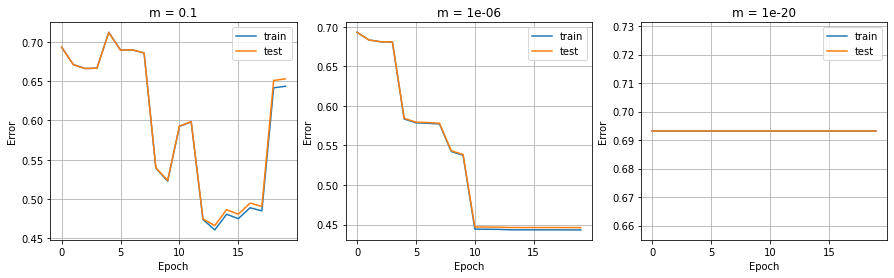

In [27]:
fig, axs = plt.subplots(1,3,sharey=False, sharex=True, figsize=(15,4))

for i in range(len(axs)):
    axs[i].plot(list(range(epochs)), loss_list[i], label = 'train')
    axs[i].plot(list(range(epochs)), valid_loss_list[i], label = 'test')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Error')
    axs[i].set_title('m = {}'.format(m_vals[i]))
    axs[i].grid()
    axs[i].legend()
    
plt.savefig('figs/m_examples')

### Train with best m value

In [28]:
epochs = 20

In [42]:
np.random.seed(987654)
w1, losses1, valid_losses1 = random_search(epochs, X_train, y_train, X_valid, y_valid, gamma=0.00001, m=best_m, loss=log_loss)

loss_w = 0.6931471805599453
valid_loss = 0.6931471805599454
loss_w = 0.4443209910015246
valid_loss = 0.4470323830212206


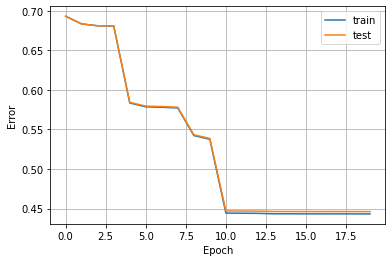

In [43]:
plt.plot(list(range(20)), losses1, label = 'train')
plt.plot(list(range(20)), valid_losses1, label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.legend()
#plt.savefig('figs/zo_classification')

## SGD

In [38]:
from sklearn.linear_model import SGDClassifier

In [39]:
model = SGDClassifier(loss = 'log', verbose=2, fit_intercept = True, learning_rate = 'constant', eta0 = 1e-5)#, max_iter=1000)

In [40]:
model.fit(X_train, y_train)

-- Epoch 1
Norm: 0.02, NNZs: 16, Bias: -0.000279, T: 2413, Avg. loss: 0.469295
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 16, Bias: -0.000517, T: 4826, Avg. loss: 0.463146
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 16, Bias: -0.000769, T: 7239, Avg. loss: 0.458510
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 16, Bias: -0.000982, T: 9652, Avg. loss: 0.458773
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 16, Bias: -0.001180, T: 12065, Avg. loss: 0.453383
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.05, NNZs: 16, Bias: -0.001391, T: 14478, Avg. loss: 0.456439
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.05, NNZs: 16, Bias: -0.001556, T: 16891, Avg. loss: 0.448866
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 0.06, NNZs: 16, Bias: -0.001758, T: 19304, Avg. loss: 0.453667
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 0.06, NNZs: 16, Bias: -0.001957, T: 21717, Avg. loss: 0.454304
Tota

SGDClassifier(eta0=1e-05, learning_rate='constant', loss='log', verbose=2)

In [44]:
w = model.coef_

pred_tr = sigmoid(X_train.dot(w.T))
sgd_loss_tr = log_loss(y_train, pred_tr)
print('training loss with SGD optimizer: {}'.format(sgd_loss_tr))
print('training loss with zero-order optimizer: {}'.format(losses1[-1]))

pred = sigmoid(X_valid.dot(w.T))
sgd_loss_valid = log_loss(y_valid, pred)
print('test loss with SGD optimizer: {}'.format(sgd_loss_valid))
print('test loss with zero-order optimizer: {}'.format(valid_losses1[-1]))

training loss with SGD optimizer: 0.41496670003074226
training loss with zero-order optimizer: 0.44326154072527146
test loss with SGD optimizer: 0.4155329480662962
test loss with zero-order optimizer: 0.44621871845312755
